In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
     

In [2]:
import nltk

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
data = pd.read_csv('/Users/ishikadang/Desktop/fake news.csv')

In [5]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
data.describe()  

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
data.shape

(20800, 5)

In [9]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
#Filling the null values
df = data.fillna('')

In [11]:
#Merging the 'title' and 'author'
df['values'] = df['author'] + ''+ df['title']

In [12]:
print(df['values'].head())

0    Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1    Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2    Consortiumnews.comWhy the Truth Might Get You ...
3    Jessica Purkiss15 Civilians Killed In Single U...
4    Howard PortnoyIranian woman jailed for fiction...
Name: values, dtype: object


In [13]:
# Separating the data and label
X = df.drop('label', axis =1)
Y = df['label']
X.head()
     

,id,title,author,text,values
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard PortnoyIranian woman jailed for fiction...


#### Stemming

In [14]:
port_stem = PorterStemmer()
def stemming(values):
    stemmed_values = re.sub('[^a-zA-Z]', ' ',values)
    stemmed_values = stemmed_values.lower()
    stemmed_values = stemmed_values.split()
    stemmed_values = [port_stem.stem(word) for word in stemmed_values if not word in stopwords.words('english')]
    stemmed_values = ''.join(stemmed_values)
    return stemmed_values

In [15]:
df['values'] = df['values'].apply(stemming)

In [16]:
print(df['values'])

0        darrellucushousdemaidevenseecomeyletterjasonch...
1        danieljflynnflynnhillariclintonbigwomancampubr...
2                     consortiumnewcomwhitruthmightgetfire
3        jessicapurkissciviliankillsinglusairstrikidentifi
4        howardportnoyiranianwomanjailfictionunpublishs...
                               ...                        
20795        jeromhudsonrapptrumpposterchildwhitesupremaci
20796    benjaminhoffmannflplayoffschedulmatchupoddnewy...
20797    michaeljdelamercrachelabramsmacisaidreceivtake...
20798        alexansarynatorussiaholdparallelexercisbalkan
20799                            davidswansonwhatkeepfaliv
Name: values, Length: 20800, dtype: object


In [17]:
#Seperating the data and label var

x = df['text'].values
y = df['label'].values

In [18]:
print(x)

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing ema

In [19]:
print(y)

[1 0 1 ... 0 1 1]


In [20]:
y.shape

(20800,)

In [21]:
x.shape

(20800,)

In [22]:
print(x,y)

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing ema

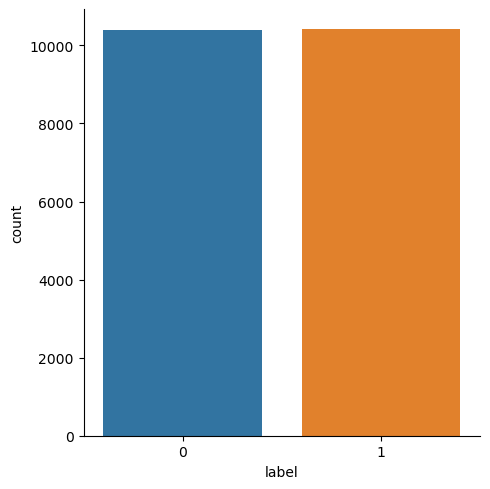

In [23]:
sns.catplot(x="label",data=df,kind='count')

In [24]:
df

,id,title,author,text,label,values
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrellucushousdemaidevenseecomeyletterjasonch...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,danieljflynnflynnhillariclintonbigwomancampubr...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnewcomwhitruthmightgetfire
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessicapurkissciviliankillsinglusairstrikidentifi
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howardportnoyiranianwomanjailfictionunpublishs...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,jeromhudsonrapptrumpposterchildwhitesupremaci
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,benjaminhoffmannflplayoffschedulmatchupoddnewy...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,michaeljdelamercrachelabramsmacisaidreceivtake...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,alexansarynatorussiaholdparallelexercisbalkan


In [25]:
df1 = df.drop(['id', 'title','author','values'], axis =1)

In [26]:
df1

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [27]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

#### Converting alphabaetical values to numerical values

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfid_vectorizer=TfidfVectorizer()
x=tfid_vectorizer.fit_transform(x)
     

In [32]:
print(x)

  (0, 153526)	0.04525694700538712
  (0, 88055)	0.042929855960956664
  (0, 22989)	0.020958199173918668
  (0, 63766)	0.011948716665346682
  (0, 28552)	0.023174020916873032
  (0, 49786)	0.01709036169441208
  (0, 31119)	0.05557218382821042
  (0, 99913)	0.008011911736567089
  (0, 35727)	0.04568933803400226
  (0, 53054)	0.014402321898472917
  (0, 94802)	0.03708594008198116
  (0, 153872)	0.008917324755964462
  (0, 86054)	0.024977722593201693
  (0, 153467)	0.010985819002751846
  (0, 138466)	0.01333017919437011
  (0, 4763)	0.03269512809589413
  (0, 134413)	0.027286128029171276
  (0, 68719)	0.021426553424507486
  (0, 126765)	0.02582994702604382
  (0, 122122)	0.02848409420697688
  (0, 138414)	0.01067721126812235
  (0, 145130)	0.008907377227106383
  (0, 131160)	0.01894336158927251
  (0, 38380)	0.02368540285119153
  (0, 81211)	0.02051443550106122
  :	:
  (20799, 150740)	0.013717471365259654
  (20799, 137804)	0.03858736760473331
  (20799, 100721)	0.013690394712874924
  (20799, 11875)	0.0316323042535

#### Splitting the data into training and test data

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, stratify = y, random_state =2)

#### Training the model: Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
pred_lr=lr.predict(x_test)

In [59]:
lr.score(x_train, y_train)

0.971025641025641

In [60]:
lr.score(x_test, y_test)

0.9390384615384615

In [61]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2597
           1       0.93      0.94      0.94      2603

    accuracy                           0.94      5200
   macro avg       0.94      0.94      0.94      5200
weighted avg       0.94      0.94      0.94      5200



#### Decison Tree¶

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
pred_dt = dt.predict(x_test)

In [71]:
dt.score(x_train, y_train)

1.0

In [72]:
dt.score(x_test, y_test)

0.8886538461538461

In [73]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2597
           1       0.89      0.89      0.89      2603

    accuracy                           0.89      5200
   macro avg       0.89      0.89      0.89      5200
weighted avg       0.89      0.89      0.89      5200



In [75]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [81]:
pred_rfc = RFC.predict(x_test)

In [82]:
RFC.score(x_test, y_test)

0.9065384615384615

In [83]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2597
           1       0.92      0.89      0.90      2603

    accuracy                           0.91      5200
   macro avg       0.91      0.91      0.91      5200
weighted avg       0.91      0.91      0.91      5200



#### Making a predicting system

In [98]:
i =0
X_new = x_test[i]

prediction = lr.predict(X_new)
print("Prediction Result : ",prediction)

if(prediction[i] == 0):
  print("This is a Real news")
else:
  print("This news is Fake!!!")

Prediction Result :  [0]
This is a Real news


In [95]:
print("Actual state of news : ", y_test[i])

if(prediction[i] == y_test[i]):
  print("Both Predicted and Actual values are same !!!")
else:
  print("Predicted value differs from Actual values")
# if Y_test[0] is equal to predicted output by the model then the prediction made by model is correct

     


Actual state of news :  0
Both Predicted and Actual values are same !!!
